In [2]:
using Plots
using LinearAlgebra

In [3]:
function boundaries_neumann0(A,N)
    A = zeros(N+2,N+2)
    A[2:N+1,2:N+1] = init_circle(X,Y,radius,N)
    A[1,2:N+1] = A[2,2:N+1]
    A[end,2:N+1] = A[end-1,2:N+1]
    A[2:N+1,1] = A[2:N+1,2]
    A[2:N+1,end] = A[2:N+1,end-1]
end
function neumann_top(phi,N)
    phi[2,2:N+1]
end
function neumann_bottom(phi,N)
    phi[end-1,2:N+1]
end
function neumann_left(phi,N)
    phi[2:N+1,2]
end
function neumann_right(phi,N)
    phi[2:N+1,end-1]
end
function grid(L0,h,N)
    [ -L0 + h*(i-1) for i=1:N+1, j = 1:N+1]
end
function cell_center(X,N)
    0.5(X[1:N,1:N]+X[2:N+1,2:N+1])
end
function init_circle(X,Y,radius,N)
    R = radius*[1 for i = 1:N, j = 1:N];
    X.^2 + Y.^2 - R
end

init_circle (generic function with 1 method)

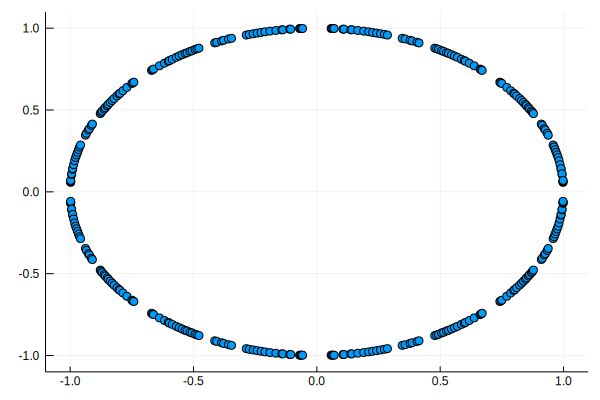

In [6]:
N = 500
L0 = 1.
h = 2*L0/N
radius = 1.
X = cell_center(transpose(grid(L0,h,N)),N);
Y = cell_center(grid(L0,h,N),N);
phi = init_circle(X,Y,radius,N);

phibc = zeros(N+2,N+2)
phibc[2:N+1,2:N+1] = init_circle(X,Y,radius,N)
phibc[1,2:N+1] = phibc[2,2:N+1];
phibc[end,2:N+1] = phibc[end-1,2:N+1]
phibc[2:N+1,1] = phibc[2:N+1,2]
phibc[2:N+1,end] = phibc[2:N+1,end-1]


#pyplot()
#plot(X,Y,phi,st=:surface,camera=(30,30))

pos = findall(x->abs(x)<1E-3,phi);
scatter(X[pos],Y[pos],legend = false, xlims = (-1.1*L0,1.1*L0), ylims = (-1.1*L0,1.1*L0))

In [ ]:
phi = zeros(N+2,N+2)
X = transpose([ -1 + h*(i-1) for i=1:N+1, j = 1:N+1])
Y = [ -1 + h*(i-1) for i=1:N+1, j = 1:N+1];
Xmid = 0.5(X[1:N,1:N]+X[2:N+1,2:N+1])
Ymid = 0.5(Y[1:N,1:N]+Y[2:N+1,2:N+1])
R = rad1[1]*[1 for i = 1:N, j = 1:N]
phi[2:N+1,2:N+1] = Xmid.^2 + Ymid.^2 - R;
#phi[1,2:N+1] = neumann_top(phi,N);
#pyplot()
#plot(Xmid,Ymid,phi,st=:surface,camera=(30,30))

In [ ]:
for i = 1:length(rad1)
    pos = findall(x->abs(x)<0.01,phi)
    display(scatter(X[pos],Y[pos],legend = false, xlims = (-1,1), ylims = (-1,1)))
    R = rad1[i]*[1 for i = 1:N+1, j = 1:N+1]
    phi = Xmid.^2 + Ymid.^2 - R;
end
#display(plot(X,Y,phi,st=:surface,camera=(30,30)))